In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

In [362]:
food_waste = pd.read_csv("FOOD_WASTE.csv", encoding='cp949')
short_term_frgn = pd.read_csv("SHORT_TERM_FRGN.csv", encoding='cp949')

C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [125]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [126]:
food_waste

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661


In [127]:
food_waste['base_date'] = pd.to_datetime(food_waste['base_date'])

In [128]:
food_waste['year'] = food_waste['base_date'].dt.year

In [129]:
food_waste['month'] = food_waste['base_date'].dt.month

In [130]:
foodwaste = food_waste.groupby(['year','month', 'emd_nm'])['em_g'].sum().reset_index()

In [131]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550
...,...,...,...,...
1661,2021,6,표선면,42453750
1662,2021,6,한경면,27060150
1663,2021,6,한림읍,82746990
1664,2021,6,화북동,110750050


<AxesSubplot:ylabel='Frequency'>

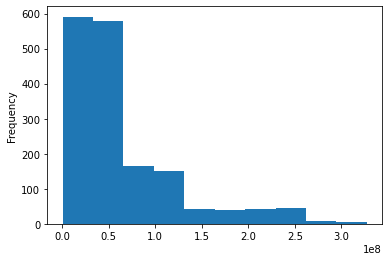

In [132]:
foodwaste['em_g'].plot.hist()

In [133]:
foodwaste['em_g'].describe()

count    1.666000e+03
mean     6.372561e+07
std      5.898525e+07
min      3.376000e+05
25%      2.312361e+07
50%      4.515420e+07
75%      8.112998e+07
max      3.274838e+08
Name: em_g, dtype: float64

In [134]:
df_boxcox = pd.Series(stats.boxcox(foodwaste['em_g'])[0])

In [135]:
print(df_boxcox.skew()) # box-cox 변환의 왜도는 0.018로 매우 낮음 => 그러나 나중에 해석할 때 힘들듯

0.018236526781358748


<AxesSubplot:ylabel='Frequency'>

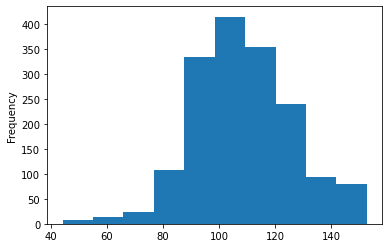

In [136]:
df_boxcox.plot.hist()

In [137]:
df_log = np.log(foodwaste['em_g'])

In [138]:
print(df_log.skew())

-0.6338405812354946


<AxesSubplot:ylabel='Frequency'>

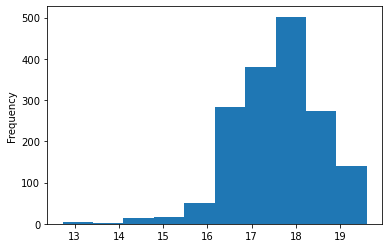

In [139]:
df_log.plot.hist()

In [140]:
foodwaste['em_g'] = np.log(foodwaste['em_g']) # 일단은 로그변환 이용

<AxesSubplot:ylabel='Frequency'>

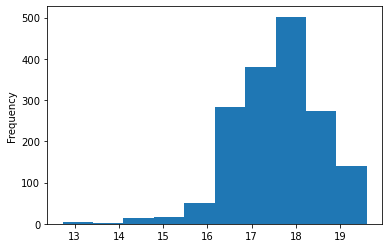

In [141]:
foodwaste['em_g'].plot.hist()

<AxesSubplot:ylabel='em_g'>

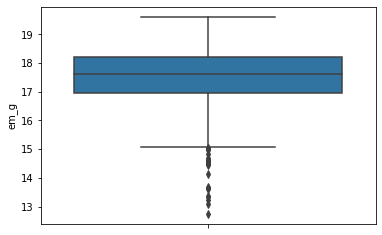

In [142]:
sns.boxplot(y='em_g',data=foodwaste)

In [143]:
scaler = StandardScaler()
foodwaste['em_g'] = scaler.fit_transform(foodwaste[['em_g']])

In [144]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,0.064537
1,2018,1,남원읍,-0.011915
2,2018,1,노형동,1.909326
3,2018,1,대륜동,0.308722
4,2018,1,대정읍,-0.103599
...,...,...,...,...
1661,2021,6,표선면,-0.011518
1662,2021,6,한경면,-0.483871
1663,2021,6,한림읍,0.688454
1664,2021,6,화북동,0.994181


In [113]:
# foodwaste[foodwaste['em_g'] >= 3.29].shape 이상치 제거하려 했으나 행의 개수가 달라지므로 일단 생략

(0, 4)

In [114]:
# foodwaste[foodwaste['em_g'] <= -3.29].shape

(9, 4)

In [115]:
# foodwaste = foodwaste[(foodwaste['em_g'] < 3.29) & (foodwaste['em_g'] > -3.29)]

In [117]:
# foodwaste[foodwaste['em_g'] <= -3.29].shape

(0, 4)

In [145]:
foodwaste_month = food_waste.groupby(['year','month'])['em_g'].sum().reset_index()

In [146]:
foodwaste_month

,year,month,em_g
0,2018,1,2419027050
1,2018,2,2245207250
2,2018,3,2460504700
3,2018,4,2263294900
4,2018,5,2323652300
5,2018,6,2439064065
6,2018,7,2941837450
7,2018,8,2762018600
8,2018,9,2405165000
9,2018,10,2263879050


In [166]:
short_term_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078
...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9.2120
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0.6039
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11.5473
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0.2013


In [363]:
short_term_frgn['base_date'] = pd.to_datetime(short_term_frgn['base_date'])
short_term_frgn['year'] = short_term_frgn['base_date'].dt.year
short_term_frgn['month'] = short_term_frgn['base_date'].dt.month

In [364]:
short_term_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt,year,month
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170,2018,1
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308,2018,1
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771,2018,1
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962,2018,1
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078,2018,1
...,...,...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9.2120,2021,6
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0.6039,2021,6
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11.5473,2021,6
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0.2013,2021,6


In [365]:
def test_time(x):
        if x<=6 : return '새벽'
        elif x<=12 : return '오전'
        elif x<=18 : return '오후'
        else: return '저녁'

In [366]:
short_term_frgn['time'] = short_term_frgn['time'].apply(test_time)

In [367]:
short_term_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt,year,month
0,2018-01-01,새벽,CHN,제주시,50110250,한림읍,66.3170,2018,1
1,2018-01-01,새벽,ETC,제주시,50110250,한림읍,21.1308,2018,1
2,2018-01-01,새벽,HKG,제주시,50110250,한림읍,3.6771,2018,1
3,2018-01-01,새벽,JPN,제주시,50110250,한림읍,5.5962,2018,1
4,2018-01-01,새벽,USA,제주시,50110250,한림읍,3.9078,2018,1
...,...,...,...,...,...,...,...,...,...
6059039,2021-06-30,저녁,USA,서귀포시,50130610,중문동,9.2120,2021,6
6059040,2021-06-30,저녁,CHN,서귀포시,50130610,중문동,0.6039,2021,6
6059041,2021-06-30,저녁,ETC,서귀포시,50130610,중문동,11.5473,2021,6
6059042,2021-06-30,저녁,CHN,서귀포시,50130620,예래동,0.2013,2021,6


In [368]:
change_nationality={'AUS' : '오세아니아', 'BGD': '아시아', 'CAN' : '북아메리카', 'CHN' : '아시아', 'DEU' : '유럽', 'EGY' : '아프리카', 'ETC' : '기타', 'FRA' : '유럽','GBR' : '유럽','IDN' : '아시아','IND' : '아시아' , 'JPN' : '아시아' ,'KAZ' : '아시아' 
,'KGZ' : '아시아' 
,'KHM' : '아시아' 
,'LKA' : '아시아' 
,'MGL' : '아시아' 
,'MMR' : '아시아' 
,'MYS' : '아시아' 
,'NGR' : '아프리카'
,'NPL' : '아시아' 
,'NZL' : '오세아니아'
,'PAK' : '아시아'
,'PHL' : '아시아'
,'RUS' : '유럽'
,'THA' : '아시아' 
,'TWN' : '아시아'
,'UKR' : '유럽' 
,'USA' : '북아메리카'
,'UZB' : '아시아'
,'VNM' : '아시아'
,'HKG' : '아시아'
,'SGP' : '아시아'}

In [369]:
short_term_frgn=short_term_frgn.replace({'nationality' : change_nationality})

In [370]:
shorttermfrgn_time = short_term_frgn.groupby(['year','month', 'emd_nm', 'time'])['visit_pop_cnt'].sum().reset_index()
shorttermfrgn_nation = short_term_frgn.groupby(['year','month', 'emd_nm', 'nationality'])['visit_pop_cnt'].sum().reset_index()

In [371]:
shorttermfrgn_time

,year,month,emd_nm,time,visit_pop_cnt
0,2018,1,건입동,새벽,20602.6410
1,2018,1,건입동,오전,17403.9754
2,2018,1,건입동,오후,16939.6242
3,2018,1,건입동,저녁,23276.8390
4,2018,1,구좌읍,새벽,10334.6981
...,...,...,...,...,...
7219,2021,6,화북동,저녁,84.2066
7220,2021,6,효돈동,새벽,55.4269
7221,2021,6,효돈동,오전,51.0371
7222,2021,6,효돈동,오후,47.8489


In [372]:
shorttermfrgn_nation

,year,month,emd_nm,nationality,visit_pop_cnt
0,2018,1,건입동,기타,6180.7434
1,2018,1,건입동,북아메리카,996.4937
2,2018,1,건입동,아시아,71045.8425
3,2018,1,구좌읍,기타,3145.8307
4,2018,1,구좌읍,북아메리카,1506.4652
...,...,...,...,...,...
5393,2021,6,화북동,북아메리카,114.2288
5394,2021,6,화북동,아시아,158.4563
5395,2021,6,효돈동,기타,90.9943
5396,2021,6,효돈동,북아메리카,6.4484


In [373]:
shorttermfrgn_month = short_term_frgn.groupby(['year','month'])['visit_pop_cnt'].sum().reset_index()

In [374]:
shorttermfrgn_month

,year,month,visit_pop_cnt
0,2018,1,3.589096e+06
1,2018,2,3.542827e+06
2,2018,3,5.228215e+06
3,2018,4,5.318488e+06
4,2018,5,5.444136e+06
5,2018,6,6.143899e+06
6,2018,7,6.903388e+06
7,2018,8,8.682890e+06
8,2018,9,6.888460e+06
9,2018,10,9.299224e+06


In [375]:
pearsonr(shorttermfrgn_month['visit_pop_cnt'],foodwaste_month['em_g'])

(-0.3154042385499646, 0.041888440284555774)

<AxesSubplot:ylabel='Frequency'>

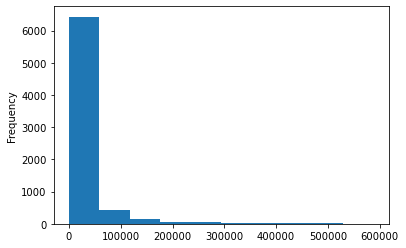

In [376]:
shorttermfrgn_time['visit_pop_cnt'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

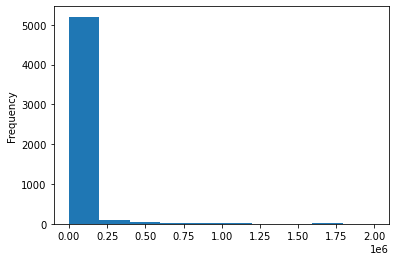

In [377]:
shorttermfrgn_nation['visit_pop_cnt'].plot.hist()

In [378]:
shorttermfrgn_time['visit_pop_cnt'].describe()

count      7224.000000
mean      26518.221834
std       61597.344646
min           1.137000
25%         599.379975
50%        7125.534850
75%       22012.128875
max      587419.551700
Name: visit_pop_cnt, dtype: float64

In [379]:
shorttermfrgn_nation['visit_pop_cnt'].describe()

count    5.398000e+03
mean     3.548863e+04
std      1.334925e+05
min      2.985000e-01
25%      4.981216e+02
50%      2.772058e+03
75%      1.804812e+04
max      1.992060e+06
Name: visit_pop_cnt, dtype: float64

In [380]:
shorttermfrgn_time['visit_pop_cnt'] = np.log(shorttermfrgn_time['visit_pop_cnt'])

In [381]:
shorttermfrgn_nation['visit_pop_cnt'] = np.log(shorttermfrgn_nation['visit_pop_cnt'])

<AxesSubplot:ylabel='Frequency'>

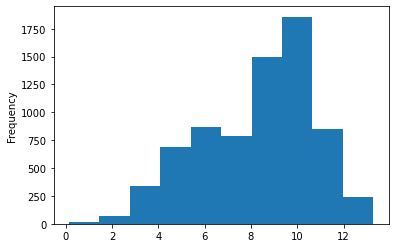

In [382]:
shorttermfrgn_time['visit_pop_cnt'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

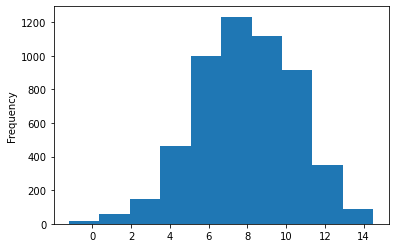

In [383]:
shorttermfrgn_nation['visit_pop_cnt'].plot.hist()

In [384]:
print(shorttermfrgn_time['visit_pop_cnt'].skew())

-0.49121082498422847


In [385]:
print(shorttermfrgn_nation['visit_pop_cnt'].skew())

-0.1982045241177886


<AxesSubplot:ylabel='visit_pop_cnt'>

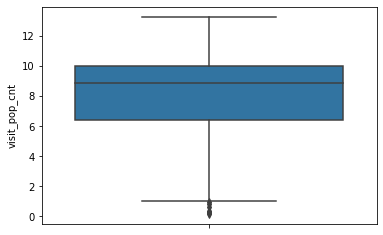

In [386]:
sns.boxplot(y='visit_pop_cnt',data=shorttermfrgn_time)

<AxesSubplot:ylabel='visit_pop_cnt'>

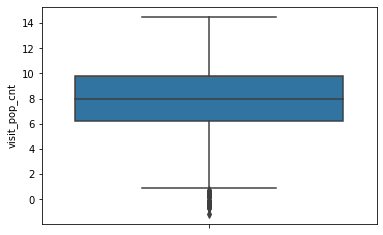

In [387]:
sns.boxplot(y='visit_pop_cnt',data=shorttermfrgn_nation)

In [388]:
shorttermfrgn_time['visit_pop_cnt'] = scaler.fit_transform(shorttermfrgn_time[['visit_pop_cnt']])
shorttermfrgn_nation['visit_pop_cnt'] = scaler.fit_transform(shorttermfrgn_nation[['visit_pop_cnt']])

In [389]:
shorttermfrgn_time

,year,month,emd_nm,time,visit_pop_cnt
0,2018,1,건입동,새벽,0.681362
1,2018,1,건입동,오전,0.611971
2,2018,1,건입동,오후,0.600849
3,2018,1,건입동,저녁,0.731554
4,2018,1,구좌읍,새벽,0.397617
...,...,...,...,...,...
7219,2021,6,화북동,저녁,-1.580615
7220,2021,6,효돈동,새벽,-1.752614
7221,2021,6,효돈동,오전,-1.786549
7222,2021,6,효돈동,오후,-1.813078


In [390]:
shorttermfrgn_nation

,year,month,emd_nm,nationality,visit_pop_cnt
0,2018,1,건입동,기타,0.318143
1,2018,1,건입동,북아메리카,-0.398829
2,2018,1,건입동,아시아,1.277492
3,2018,1,구좌읍,기타,0.052813
4,2018,1,구좌읍,북아메리카,-0.236464
...,...,...,...,...,...
5393,2021,6,화북동,북아메리카,-1.249806
5394,2021,6,화북동,아시아,-1.121229
5395,2021,6,효돈동,기타,-1.339148
5396,2021,6,효돈동,북아메리카,-2.379067


In [391]:
shorttermfrgn_time = pd.get_dummies(shorttermfrgn_time, columns=['time'], drop_first=True)

In [392]:
shorttermfrgn_time

,year,month,emd_nm,visit_pop_cnt,time_오전,time_오후,time_저녁
0,2018,1,건입동,0.681362,0,0,0
1,2018,1,건입동,0.611971,1,0,0
2,2018,1,건입동,0.600849,0,1,0
3,2018,1,건입동,0.731554,0,0,1
4,2018,1,구좌읍,0.397617,0,0,0
...,...,...,...,...,...,...,...
7219,2021,6,화북동,-1.580615,0,0,1
7220,2021,6,효돈동,-1.752614,0,0,0
7221,2021,6,효돈동,-1.786549,1,0,0
7222,2021,6,효돈동,-1.813078,0,1,0


In [393]:
shorttermfrgn_nation = pd.get_dummies(shorttermfrgn_nation, columns=['nationality'], drop_first=True)

In [394]:
shorttermfrgn_nation

,year,month,emd_nm,visit_pop_cnt,nationality_북아메리카,nationality_아시아
0,2018,1,건입동,0.318143,0,0
1,2018,1,건입동,-0.398829,1,0
2,2018,1,건입동,1.277492,0,1
3,2018,1,구좌읍,0.052813,0,0
4,2018,1,구좌읍,-0.236464,1,0
...,...,...,...,...,...,...
5393,2021,6,화북동,-1.249806,1,0
5394,2021,6,화북동,-1.121229,0,1
5395,2021,6,효돈동,-1.339148,0,0
5396,2021,6,효돈동,-2.379067,1,0


In [396]:
shorttermfrgn_time_merge = foodwaste.merge(shorttermfrgn_time, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])
shorttermfrgn_nation_merge = foodwaste.merge(shorttermfrgn_nation, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [398]:
shorttermfrgn_time_merge

,year,month,emd_nm,em_g,visit_pop_cnt,time_오전,time_오후,time_저녁
0,2018,1,건입동,0.064537,0.681362,0,0,0
1,2018,1,건입동,0.064537,0.611971,1,0,0
2,2018,1,건입동,0.064537,0.600849,0,1,0
3,2018,1,건입동,0.064537,0.731554,0,0,1
4,2018,1,남원읍,-0.011915,1.125761,0,0,0
...,...,...,...,...,...,...,...,...
6531,2021,6,화북동,0.994181,-1.580615,0,0,1
6532,2021,6,효돈동,-0.464898,-1.752614,0,0,0
6533,2021,6,효돈동,-0.464898,-1.786549,1,0,0
6534,2021,6,효돈동,-0.464898,-1.813078,0,1,0


In [399]:
shorttermfrgn_time_x = shorttermfrgn_time_merge.loc[:,['visit_pop_cnt', 'time_오전','time_오후','time_저녁']]
shorttermfrgn_time_y = shorttermfrgn_time_merge.loc[:,['em_g']]

In [400]:
shorttermfrgn_time_x = sm.add_constant(shorttermfrgn_time_x)

In [401]:
model1 = sm.OLS(shorttermfrgn_time_y, shorttermfrgn_time_x)

In [402]:
result1 = model1.fit()

In [403]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.988
Date:                Wed, 25 Aug 2021   Prob (F-statistic):            0.00311
Time:                        10:19:59   Log-Likelihood:                -8668.4
No. Observations:                6536   AIC:                         1.735e+04
Df Residuals:                    6531   BIC:                         1.738e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0573      0.023      2.538      0.011       0.013       0.101
visit_pop_cnt     0.0439      0.011      3.994      0.000       0.022       0.065
time_오전        2.805e-05      0.032      0.001      0.999      -0.063       0.063
time_오후           0.0006      0.032      0.020      0.984      -0.062       0.063
time_저녁          -0.0002      0.032     -0.005      0.996      -0.063       0.062
==============================================================================
Omnibus:                       36.160   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.648
Skew:                          -0.178   Prob(JB):                     1.10e-08
Kurtosis:                       3.087   Cond. No.                         4.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [404]:
shorttermfrgn_nation_merge

,year,month,emd_nm,em_g,visit_pop_cnt,nationality_북아메리카,nationality_아시아
0,2018,1,건입동,0.064537,0.318143,0,0
1,2018,1,건입동,0.064537,-0.398829,1,0
2,2018,1,건입동,0.064537,1.277492,0,1
3,2018,1,남원읍,-0.011915,1.114903,0,0
4,2018,1,남원읍,-0.011915,0.012770,1,0
...,...,...,...,...,...,...,...
4877,2021,6,화북동,0.994181,-1.249806,1,0
4878,2021,6,화북동,0.994181,-1.121229,0,1
4879,2021,6,효돈동,-0.464898,-1.339148,0,0
4880,2021,6,효돈동,-0.464898,-2.379067,1,0


In [405]:
shorttermfrgn_nation_x = shorttermfrgn_nation_merge.loc[:,['visit_pop_cnt', 'nationality_북아메리카','nationality_아시아']]
shorttermfrgn_nation_y = shorttermfrgn_nation_merge.loc[:,['em_g']]

In [406]:
shorttermfrgn_nation_x = sm.add_constant(shorttermfrgn_nation_x)

In [407]:
model2 = sm.OLS(shorttermfrgn_nation_y, shorttermfrgn_nation_x)

In [408]:
result2 = model2.fit()

In [410]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.647
Date:                Wed, 25 Aug 2021   Prob (F-statistic):            0.00301
Time:                        10:26:15   Log-Likelihood:                -6476.7
No. Observations:                4882   AIC:                         1.296e+04
Df Residuals:                    4878   BIC:                         1.299e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0606      0.023      2.680      0.007       0.016       0.105
visit_pop_cnt         0.0517      0.014      3.732      0.000       0.025       0.079
nationality_북아메리카     0.0218      0.033      0.667      0.505      -0.042       0.086
nationality_아시아      -0.0273      0.033     -0.837      0.403      -0.091       0.037
==============================================================================
Omnibus:                       27.179   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.490
Skew:                          -0.179   Prob(JB):                     1.07e-06
Kurtosis:                       3.085   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""